In [1]:
import os
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from dl_methods import Dl

warnings.filterwarnings('ignore')

In [2]:
data_path = os.getcwd()+f'//..//..//data//raw//animals10_small'
data_join = [os.path.join(data_path, data) for data in os.listdir(data_path)]
path = [os.path.join(data, file) for data in data_join for file in os.listdir(data)]

In [3]:
b_model = ResNet50(weights='imagenet',include_top=False)

In [4]:
method = Dl()

In [5]:
extract_im = method.extract_images(path, b_model)

In [6]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)

In [8]:
predicted_labels = kmeans.fit_predict(extract_im)


Cluster 1:


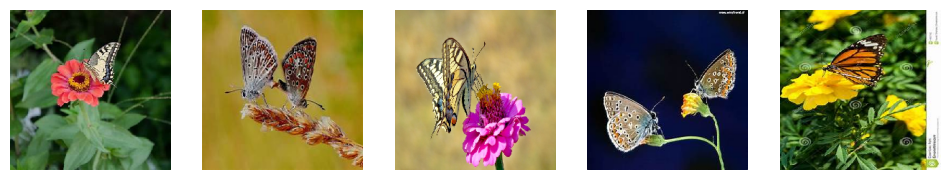

Cluster 2:


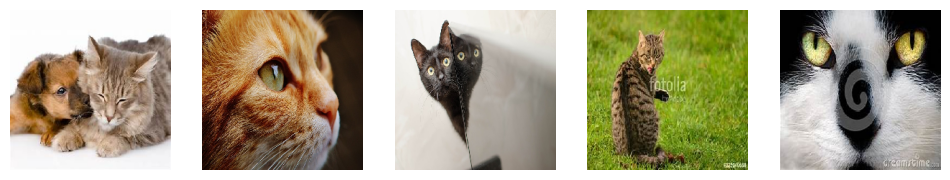

Cluster 3:


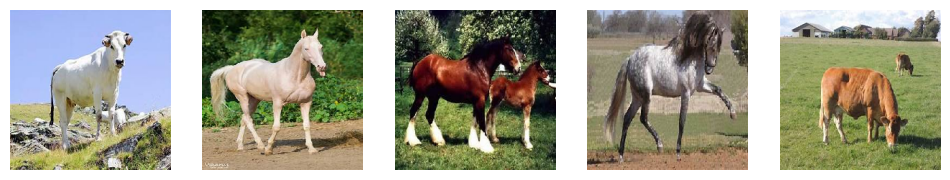

Cluster 4:


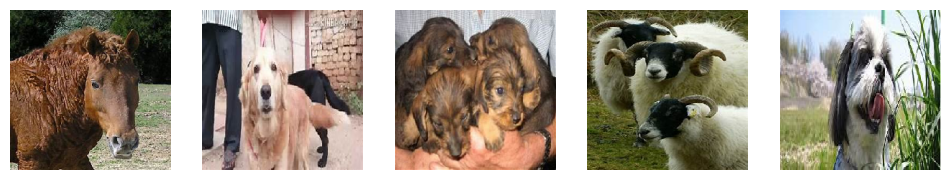

Cluster 5:


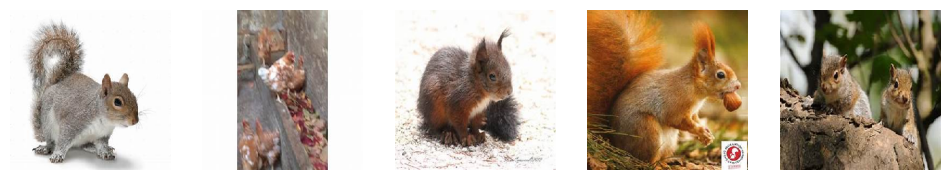

Cluster 6:


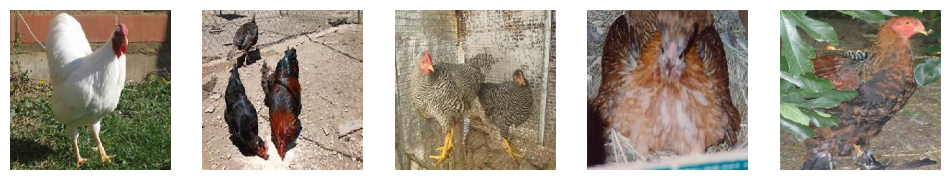

Cluster 7:


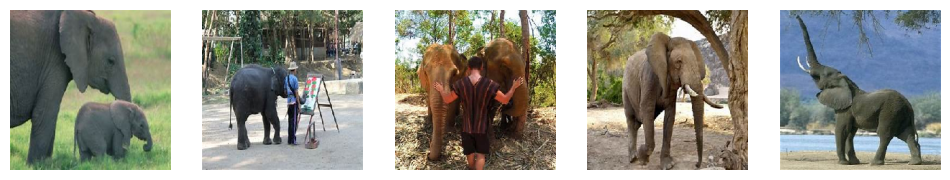

Cluster 8:


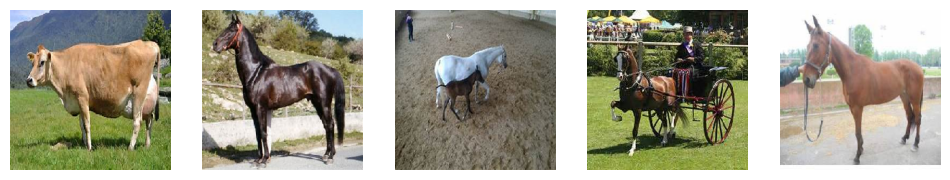

Cluster 9:


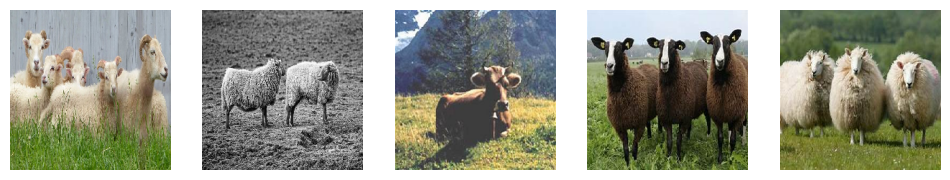

Cluster 10:


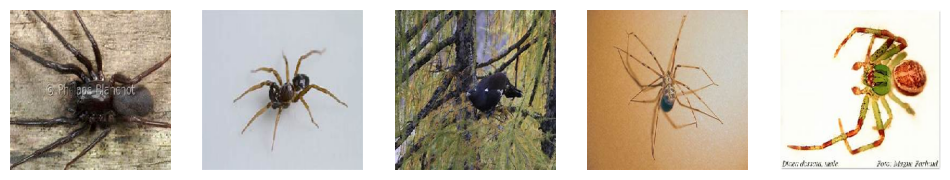

In [9]:
for cluster_id in range(10):
    print(f'Cluster {cluster_id + 1}:')
    method.image_show(path, predicted_labels, cluster_id)

In [10]:
t_labels = [os.path.basename(os.path.dirname(path_image)) for path_image in path]

In [11]:
labels_encoded = LabelEncoder()
true_labels_encoded = labels_encoded.fit_transform(t_labels)

In [12]:
class_names = np.array(labels_encoded.classes_)

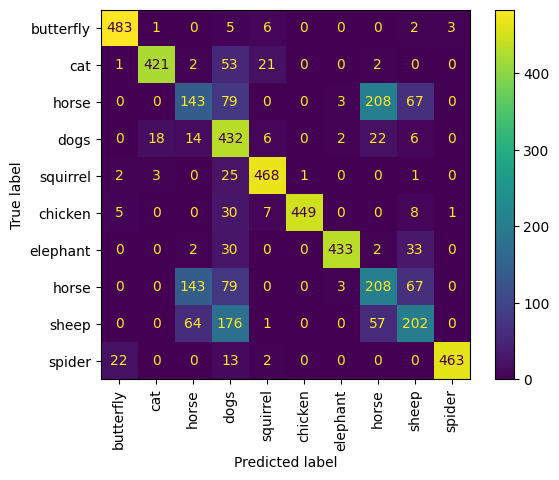

In [13]:
confusion = confusion_matrix(true_labels_encoded, predicted_labels)
order = np.argmax(confusion, axis=0)
confusion = confusion[order]
class_names = class_names[order]
ConfusionMatrixDisplay(confusion, display_labels=class_names).plot()
plt.xticks(rotation=90)
plt.show()

In [14]:
method.validation(confusion)

Acurácia: 74.04%
Precisão: 75.76%
Revocação: 74.04%
F1-Score: 74.05%
